In [15]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

#model = NeuralNetwork()

In [16]:
loss_fn = nn.CrossEntropyLoss()

In [17]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    sum_loss = 0
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        sum_loss += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [18]:
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct, test_loss

In [19]:
def run_training(epochs, train_dataloader, model, loss_fn, optimizer):
    test_loss = []
    train_loss = [] 
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        sum_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
        train_loss.append(sum_loss)

        acc, avg_loss = test_loop(test_dataloader, model, loss_fn)
        test_loss.append(avg_loss)
    print("Done!")
    
    return test_loss

In [20]:
learning_rate = 1e-3
batch_size = 64
epochs = 50

In [21]:
model = NeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loss_sgd = run_training(epochs, train_dataloader, model, loss_fn, optimizer)

Epoch 1
-------------------------------
loss: 2.316816  [   64/60000]
loss: 2.290034  [ 6464/60000]
loss: 2.274740  [12864/60000]
loss: 2.266258  [19264/60000]
loss: 2.242745  [25664/60000]
loss: 2.219591  [32064/60000]
loss: 2.217637  [38464/60000]
loss: 2.185969  [44864/60000]
loss: 2.184150  [51264/60000]
loss: 2.149746  [57664/60000]
Test Error: 
 Accuracy: 49.0%, Avg loss: 2.141117 

Epoch 2
-------------------------------
loss: 2.158945  [   64/60000]
loss: 2.138107  [ 6464/60000]
loss: 2.077808  [12864/60000]
loss: 2.099748  [19264/60000]
loss: 2.048441  [25664/60000]
loss: 1.984797  [32064/60000]
loss: 2.008270  [38464/60000]
loss: 1.925330  [44864/60000]
loss: 1.933874  [51264/60000]
loss: 1.863285  [57664/60000]
Test Error: 
 Accuracy: 60.4%, Avg loss: 1.854371 

Epoch 3
-------------------------------
loss: 1.890129  [   64/60000]
loss: 1.850590  [ 6464/60000]
loss: 1.727780  [12864/60000]
loss: 1.783758  [19264/60000]
loss: 1.675671  [25664/60000]
loss: 1.622105  [32064/600

In [22]:
print(train_loss_sgd)

[2.141117225027388, 1.8543714611393631, 1.483857485139446, 1.2285382386985098, 1.0707827506551317, 0.9684371097831969, 0.8981707240365873, 0.8473540210420158, 0.8086843241931526, 0.7778193212238846, 0.7520978638700618, 0.7299040753370637, 0.7102599988697441, 0.6925694503981596, 0.6764765009758579, 0.6617454918706493, 0.6482316451087878, 0.6358488701331387, 0.624483035248556, 0.6140596972908944, 0.6044867446847783, 0.5956703358015437, 0.587555966559489, 0.5800692564362933, 0.5731411843922487, 0.5667135445934952, 0.5607385608800657, 0.5551718095685266, 0.5499708701850502, 0.5451120662081773, 0.5405673975018179, 0.5363064691139634, 0.5323031072024327, 0.5285346764288131, 0.5249768501254404, 0.521615291477009, 0.5184303167139649, 0.5154097537705853, 0.5125406238303822, 0.5098064613949721, 0.5071988885949372, 0.5047088698217064, 0.502320148762624, 0.5000303315508897, 0.49784257799197157, 0.4957445081631849, 0.49372478996872143, 0.49177880499772963, 0.48990530686773315, 0.4881002927661701]


In [23]:
model = NeuralNetwork()
optimizer = torch.optim.RMSprop(model.parameters(), lr = learning_rate, alpha = 0.9)
train_loss_rms = run_training(epochs, train_dataloader, model, loss_fn, optimizer)

Epoch 1
-------------------------------
loss: 2.303679  [   64/60000]
loss: 0.577611  [ 6464/60000]
loss: 0.450491  [12864/60000]
loss: 0.477545  [19264/60000]
loss: 0.461682  [25664/60000]
loss: 0.439997  [32064/60000]
loss: 0.388071  [38464/60000]
loss: 0.544898  [44864/60000]
loss: 0.497059  [51264/60000]
loss: 0.451598  [57664/60000]
Test Error: 
 Accuracy: 81.4%, Avg loss: 0.499902 

Epoch 2
-------------------------------
loss: 0.280027  [   64/60000]
loss: 0.324701  [ 6464/60000]
loss: 0.273512  [12864/60000]
loss: 0.336404  [19264/60000]
loss: 0.360809  [25664/60000]
loss: 0.398778  [32064/60000]
loss: 0.299972  [38464/60000]
loss: 0.444050  [44864/60000]
loss: 0.441349  [51264/60000]
loss: 0.360691  [57664/60000]
Test Error: 
 Accuracy: 84.4%, Avg loss: 0.435987 

Epoch 3
-------------------------------
loss: 0.225253  [   64/60000]
loss: 0.366152  [ 6464/60000]
loss: 0.232662  [12864/60000]
loss: 0.283454  [19264/60000]
loss: 0.319504  [25664/60000]
loss: 0.403279  [32064/600

In [24]:
print(train_loss_rms)

[0.4999023481349277, 0.43598749797055675, 0.44420536526828813, 0.4421981832214222, 0.45688213455449245, 0.486290968385092, 0.49599288441952627, 0.4962825814060345, 0.5052622475536765, 0.5035646376526279, 0.5637906590939328, 0.5517813492162972, 0.6112384828412609, 0.6015973979619088, 0.6077738494202969, 0.704461469570068, 0.6281343982288032, 0.7152279951390187, 0.6390248164771848, 0.6803060184191366, 0.7373313933231269, 0.7354527052705455, 0.7710367082410557, 0.8326451038692597, 0.8135686275211109, 0.906217867259387, 0.9198303876836209, 0.9988761331625046, 0.9157126096972994, 0.9204597430552837, 0.7952312016207131, 1.057845672473881, 0.8528277387095106, 1.1305894993221874, 1.0391305238957618, 1.0453738769528214, 1.037812524611593, 1.065417403924712, 1.106998611312763, 1.101371788390123, 1.2772691594377446, 1.0741544665804335, 1.2273085068935041, 1.2919851669650169, 1.2478438100902138, 1.1279333890148788, 1.236450650604667, 1.3808372985975, 1.3304877935606203, 1.3184952377608627]


In [25]:
# Постройте графики зависимости сходимости (значение функции потерь от количества итераций работы алгоритма)
# от выбора оптимизационного метода
# количество эпох = 50
# Сравните, сделайте выводы
# https://pytorch.org/docs/stable/optim.html

In [26]:
model = NeuralNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
train_loss_adam = run_training(epochs, train_dataloader, model, loss_fn, optimizer)

Epoch 1
-------------------------------
loss: 2.305149  [   64/60000]
loss: 0.551563  [ 6464/60000]
loss: 0.390187  [12864/60000]
loss: 0.491140  [19264/60000]
loss: 0.453302  [25664/60000]
loss: 0.425352  [32064/60000]
loss: 0.375839  [38464/60000]
loss: 0.510852  [44864/60000]
loss: 0.466625  [51264/60000]
loss: 0.511052  [57664/60000]
Test Error: 
 Accuracy: 84.5%, Avg loss: 0.429024 

Epoch 2
-------------------------------
loss: 0.295980  [   64/60000]
loss: 0.356976  [ 6464/60000]
loss: 0.264798  [12864/60000]
loss: 0.370653  [19264/60000]
loss: 0.417076  [25664/60000]
loss: 0.394324  [32064/60000]
loss: 0.307699  [38464/60000]
loss: 0.487727  [44864/60000]
loss: 0.403842  [51264/60000]
loss: 0.433328  [57664/60000]
Test Error: 
 Accuracy: 85.3%, Avg loss: 0.400412 

Epoch 3
-------------------------------
loss: 0.239323  [   64/60000]
loss: 0.328177  [ 6464/60000]
loss: 0.227598  [12864/60000]
loss: 0.324170  [19264/60000]
loss: 0.369364  [25664/60000]
loss: 0.359571  [32064/600

In [27]:
print(train_loss_adam)

[0.42902419559515204, 0.4004117350099952, 0.37199140914306517, 0.3630969958130721, 0.3534968376729139, 0.36113306187140715, 0.3616665395771622, 0.33552801689714384, 0.34958702292601773, 0.3554676919700993, 0.3710799934757743, 0.38863487589131496, 0.4183714895681211, 0.43516084195891763, 0.4480371307225744, 0.4441288799332206, 0.4341743482620853, 0.48322067943632985, 0.5412928374472318, 0.4880398583545047, 0.49341550459907313, 0.5107728264110672, 0.5285976232521853, 0.5550633558416205, 0.5396680564139109, 0.5820090497731213, 0.544566576873326, 0.550788343771343, 0.6004632583279519, 0.5849830896718202, 0.6098847894626818, 0.58351089025901, 0.6384819688121225, 0.6436213051698579, 0.6410698579137872, 0.6235208477421551, 0.6322625131126801, 0.7075227293844711, 0.6743651526464018, 0.6217735663388565, 0.71204389234898, 0.6813063355893858, 0.6826929196352577, 0.7239371244187591, 0.7164278182762402, 0.7146193075626288, 0.7834745160443782, 0.8029771158853576, 0.8320244315160427, 0.80042978657771

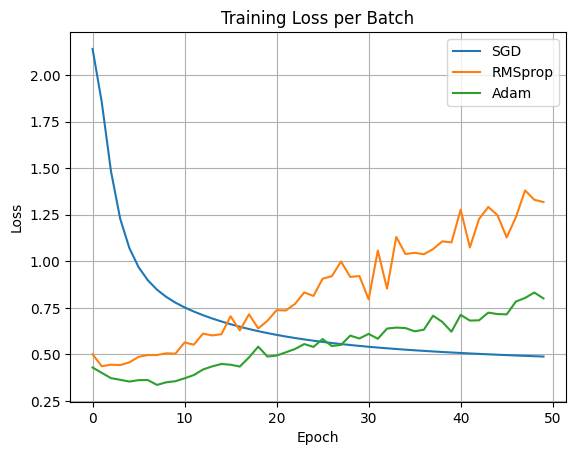

In [28]:

plt.plot(train_loss_sgd, label="SGD")
plt.plot(train_loss_rms, label="RMSprop")
plt.plot(train_loss_adam, label="Adam")
plt.title("Training Loss per Batch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

SGD показывает наилучшую стабильность и достигает минимальных значений функции потерь при увеличении числа эпох, несмотря на медленную сходимость на начальных этапах. RMSprop быстро снижает потери в начале, но затем теряет стабильность, что приводит к колебаниям или увеличению потерь, особенно на поздних этапах обучения. Adam эффективно сходится на первых стадиях обучения, обеспечивая быстрый спад потерь, однако на более поздних этапах его сходимость замедляется, и он не достигает таких низких значений потерь, как SGD.

В долгосрочной перспективе SGD оказывается наиболее надёжным выбором, особенно при большом количестве эпох. RMSprop и Adam лучше подходят для задач, требующих быстрой сходимости на начальных этапах, но требуют тщательной настройки гиперпараметров для достижения стабильности и точности.